# Introduction
Using the Ames, Iowa home price dataset, we will learn how to work with basic data.


There are 79 types of explanatory variables related to housing, so let's explore the relationship between them and prices.


It is also a good idea to check out Wikipedia to see what kind of city Ames is.

In [120]:
# predefines and import
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

# pd.set_option("max_rows", 7)

# Problem 1
## Obtaining Data Set

In [121]:
house_price = pd.read_csv('houseprice_train.csv')
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Problem 2
## Investigate data

### Dataset Description:
- Provide us with 79 features representing every aspects of houses so that we can use to do our research (estimating house price) 
### **Data Fields:**
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

... more is included in the description of the data [Here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


# Problem 3
## Investigate Data

### Type Overview

In [122]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Target Variable is the last column

In [123]:
house_price.iloc[:,-1]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Simple Statistic Info

In [124]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Problem 4
## Dealing with missing values

### Getting nan value counts and displaying

In [125]:
na_count = house_price.isna().sum()
non_na_count = house_price.count()
c = pd.DataFrame(data = na_count/(na_count+non_na_count), columns = ['Missing Ratio'])

print('Only showing percentage of columns with nan values')
missing_statistics = c.iloc[(c>0).values, :]
missing_statistics

Only showing percentage of columns with nan values


,Missing Ratio
LotFrontage,0.177397
Alley,0.937671
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685


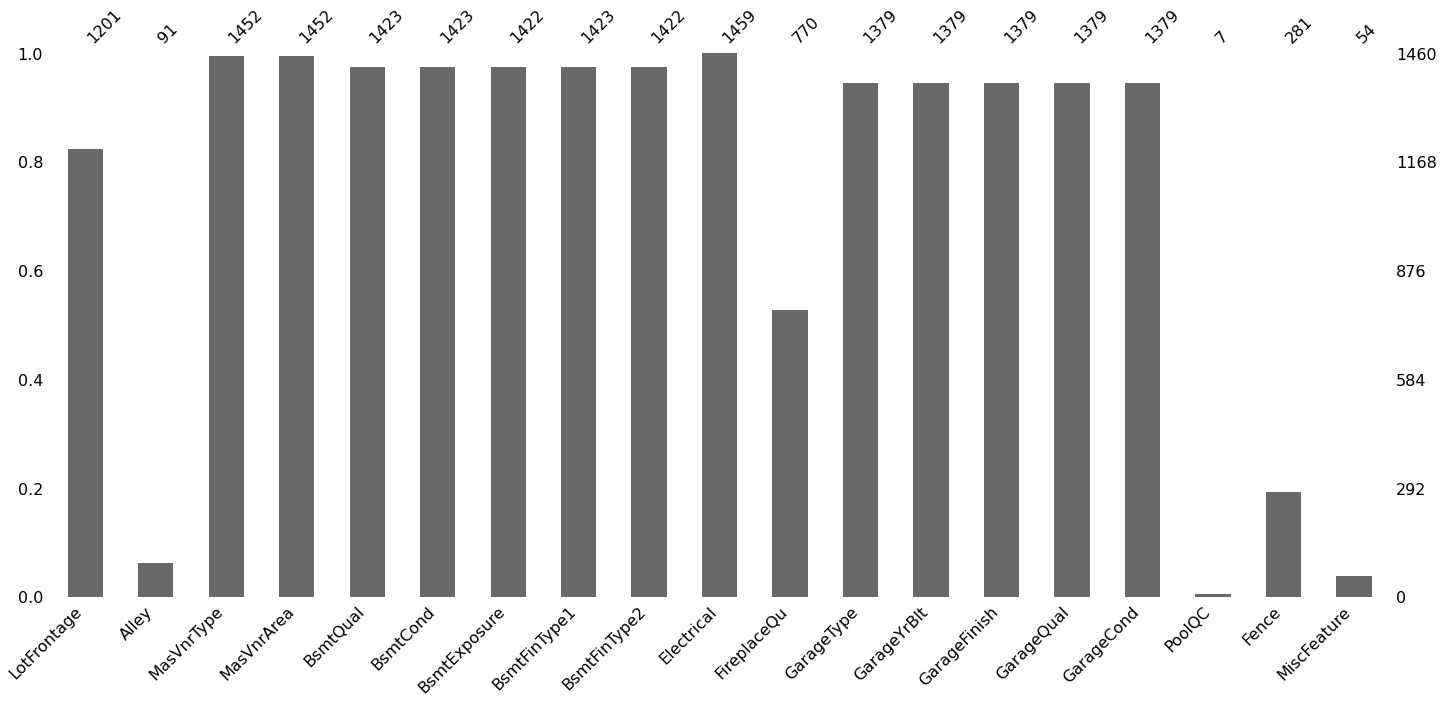

In [126]:
col_count = len(house_price.columns)
missingno.bar(house_price[missing_statistics.index]);

### Removing attributes with more than 5 nan
And drop rows with nan afterwards


In [127]:
attribute_to_remove = na_count.iloc[(na_count>5).values].index
house_price = house_price.drop(columns= attribute_to_remove)
house_price.dropna(inplace = True)
house_price

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Problem 5
## Research Terminology 

## Skewness and Kertosis
### Both are used to describe the difference of distribution
- Skewness is for the symetry of the distribution with sk = 0 meaning symetry and sk < 0 meaning left skew and >0 indicating right skew
- Right skew have their tail spred to the right while left skew being the other way around.
### Though for symetrical distributions, it's hard to tell their difference if they have same variance and mean -> Leading to the use of Kertosis to describe their difference.
- Kertosis means tailed-ness, describing the concentration of value at the tail of a distribution (outliers for example contributes to this greatly)
- The Kertosis of a Normal distribution is 3 while others could have fatter tail (>3) or thinner tail (>=1 and <3). Example of thinner tail is uniform distribution on a finite domain.

# Problem 6
## Confirming Distribution

### Original Distribution of Target Variable

Skewness: 1.8819429948035529, Kurtosis: 6.529263049673958


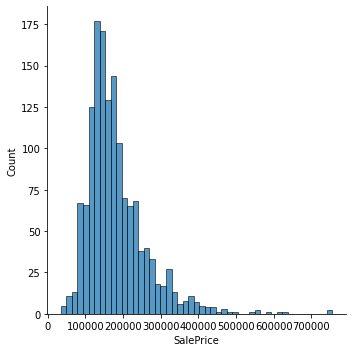

In [128]:
target = house_price.iloc[:,-1]
sns.displot(target)
print(f'Skewness: {target.skew()}, Kurtosis: {target.kurtosis()}')

### Distribution after log transformation

Log transformed skewness: 0.12131775882415026, kurtosis: 0.806927847502148


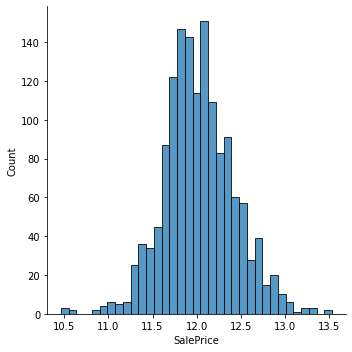

In [129]:
#logarithimic transformation
loged_target = np.log(target)
sns.displot(loged_target)
print(f'Log transformed skewness: {loged_target.skew()}, kurtosis: {loged_target.kurtosis()}')

### Observation on changes before and after log-transformation:
- Data is quite symetrical after transformation and have much lower kurtosis.
- At a glimse, the data look quite "normal". Calculation is needed to check tho.
- Can say that the log-tranformation kinda 'normalized' the data, or at least reduced the skewness.
### Normal Distribution:
- Distibution that's symetrical and have a distinctive bell look.
- Most things in nature follow this distibution, that's why i like to really see it as the "normal" distribution.

# Problem 7
## Confirming the correlation coefficient

### Overall Correlation

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,...,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924


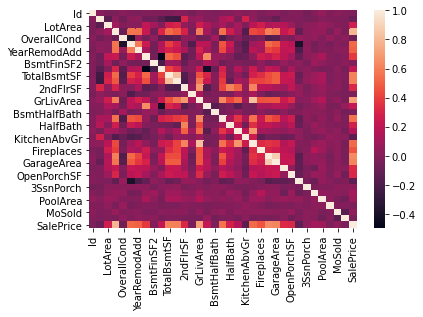

In [130]:
corr_matrix = house_price.corr()
sns.heatmap(corr_matrix);
corr_matrix.head()

### Top 10 attributes relating to target variable

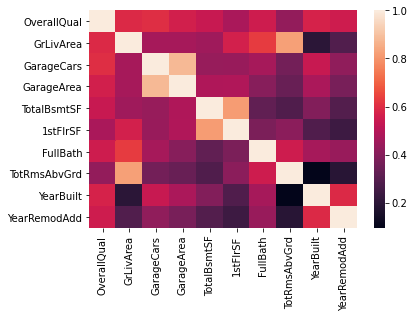

In [131]:
sorted_related_attributes = corr_matrix.iloc[:, -1].abs().sort_values(ascending = False)
best_related_attributes = sorted_related_attributes.index[1:11] # top 10

attribute_corr_matrix = house_price[best_related_attributes].corr()
sns.heatmap(attribute_corr_matrix);

### Breif of the 10 above chossen attributes:
- OverallQual: Overall material and finish quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

### Find dependent pairs
Among attributes that contributes to target variable

In [132]:
from itertools import combinations
all_combinations = list(combinations(best_related_attributes,2))
dependent_pairs = []
for pair in all_combinations:
    if pair[0] == pair[1]: continue
    corr = attribute_corr_matrix.loc[pair[0], pair[1]]
    if corr > 0.5 or corr < -0.5: dependent_pairs.append((pair,corr))
print('Dependent Attribute Pairs: ')
for i in dependent_pairs:
    print(i[0], ' with correlation: ', i[1])

Dependent Attribute Pairs: 
('OverallQual', 'GrLivArea')  with correlation:  0.5930207837339594
('OverallQual', 'GarageCars')  with correlation:  0.6009908508426033
('OverallQual', 'GarageArea')  with correlation:  0.561979895473211
('OverallQual', 'TotalBsmtSF')  with correlation:  0.5375225406670561
('OverallQual', 'FullBath')  with correlation:  0.551267390741308
('OverallQual', 'YearBuilt')  with correlation:  0.5733339631760762
('OverallQual', 'YearRemodAdd')  with correlation:  0.5516053856834794
('GrLivArea', '1stFlrSF')  with correlation:  0.5660836985804983
('GrLivArea', 'FullBath')  with correlation:  0.6302830835372175
('GrLivArea', 'TotRmsAbvGrd')  with correlation:  0.8255764500702395
('GarageCars', 'GarageArea')  with correlation:  0.8826130266800467
('GarageCars', 'YearBuilt')  with correlation:  0.5378661932175327
('TotalBsmtSF', '1stFlrSF')  with correlation:  0.8193932708606798
('FullBath', 'TotRmsAbvGrd')  with correlation:  0.5547589450178979
('YearBuilt', 'YearRemo